In [ ]:
# Importar libreria requerida
import pandas as pd
import numpy as np
import os

In [ ]:
# Métrica de Evaluación
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from sklearn import metrics

In [ ]:
# No presentar advertencias
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Visualización de datos
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [ ]:
#!pip install adfuller
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.8 MB/s eta 0:00:00


In [ ]:
# ruta de archivos
files = os.listdir("c:\\archivos\proyecto")
os.chdir(r'C:\archivos\proyecto')

csv_path = 'ind_urgencias_final_2023_filtrado.txt'

# Read data from CSV file
df = pd.read_csv(csv_path,sep=";",header= None)

In [ ]:
# ruta de archivos con colab google

#csv_path = 'ind_urgencias_final_2023_filtrado.txt'
csv_path = 'indicadores de urgencias.txt'

# Read data from CSV file
df = pd.read_csv(csv_path,sep=";",header= None)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,TIEMPO_LLEGADA_A_TRIAGE,TIEMPO_TRIAGE_A_INGRESO,TIEMPO_INGRESO_A_FOLIO,TIEMPO_TOTAL,FECHA_LLEGADA,FECHA_TRIAGE,FECHA_INGRESO,FECHA_CONSULTA,CENTRO_ATENCION,CLASIFICACION_TRIAGE,PACIENTE_#_DOCUMENTO,PACIENTE_EDAD,EDAD_RANGO,SEXO,RÉGIMEN PACIENTE,NOMBRE_ENTIDAD,NOM_TIPO_HISTORIA,DIAGNOSTICO,NOMBRE DX
1,0:00:00,0:16:13,0:08:47,0:25:00,2/08/2016 7:19,2/08/2016 7:19,2/08/2016 7:36,2/08/2016 7:45,VA - CENTRO DE SALUD CANDELARIA I C. BOLÍVAR,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,4108268,77 AÑO(S),VEJEZ,MASCULINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,H813,OTROS VERTIGOS PERIFERICOS ...
2,0:00:00,0:08:06,0:01:27,0:09:33,2/08/2016 7:58,2/08/2016 7:58,2/08/2016 8:07,2/08/2016 8:09,VA - CENTRO DE SALUD CANDELARIA I C. BOLÍVAR,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,1026581403,21 AÑO(S),JUVENTUD,FEMENINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,A060,DISENTERIA AMEBIANA AGUDA ...
3,0:00:00,0:33:41,0:04:12,0:37:53,3/08/2016 9:10,3/08/2016 9:10,3/08/2016 9:44,3/08/2016 9:48,VA - CENTRO DE SALUD CANDELARIA I C. BOLÍVAR,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,19334228,65 AÑO(S),VEJEZ,MASCULINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
4,0:00:00,0:17:52,0:02:22,0:20:14,3/08/2016 13:05,3/08/2016 13:05,3/08/2016 13:23,3/08/2016 13:26,VC - CENTRO DE SALUD JERUSALÉN,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,52238647,40 AÑO(S),ADULTEZ,FEMENINO,VINCULADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA MEDICINA GENERAL,J039,"AMIGDALITIS AGUDA, NO ESPECIFICADA ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121256,0:00:00,0:41:05,0:18:40,0:59:45,19/05/2017 18:05,19/05/2017 18:05,19/05/2017 18:47,19/05/2017 19:05,VB - HOSPITAL VISTA HERMOSA,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,1031160974,3 AÑO(S),PRIMERA INFANCIA,FEMENINO,CONTRIBUTIVO,SALUD TOTAL SA EPS,CONSULTA INICIAL DE URGENCIAS,N390,"INFECCION DE VIAS URINARIAS, SITIO NO ESPECIFI..."
121257,0:00:00,0:31:57,0:11:33,0:43:30,18/05/2017 13:18,18/05/2017 13:18,18/05/2017 13:50,18/05/2017 14:02,ME - HOSPITAL MEISSEN,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,5966047,70 AÑO(S),VEJEZ,MASCULINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,K297,"GASTRITIS, NO ESPECIFICADA ..."
121258,0:00:00,0:10:19,0:06:26,0:16:45,20/05/2017 11:31,20/05/2017 11:31,20/05/2017 11:42,20/05/2017 11:48,JC - CENTRO DE SALUD EL CARMEN,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,1018458868,24 AÑO(S),JUVENTUD,FEMENINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,Z359,"SUPERVISION DE EMBARAZO DE ALTO RIESGO, SIN OT..."
121259,0:00:00,0:26:17,0:05:49,0:32:06,25/05/2017 14:20,25/05/2017 14:20,25/05/2017 14:47,25/05/2017 14:52,JC - CENTRO DE SALUD EL CARMEN,2 - TRIAGE II - ANTES DE LOS 30 MINUTOS,1033768047,4 AÑO(S),PRIMERA INFANCIA,FEMENINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,S903,CONTUSION DE OTRAS PARTES Y DE LAS NO ESPECIFI...


In [ ]:
headers = ["TIEMPO_LLEGADA_A_TRIAGE","TIEMPO_TRIAGE_A_INGRESO","TIEMPO_INGRESO_A_FOLIO","TIEMPO_TOTAL","FECHA_LLEGADA","FECHA_TRIAGE","FECHA_INGRESO","FECHA_CONSULTA","CENTRO_ATENCION","CLASIFICACION_TRIAGE","PACIENTE_#_DOCUMENTO","PACIENTE_EDAD","EDAD_RANGO","SEXO","RÉGIMEN PACIENTE","NOMBRE_ENTIDAD","NOM_TIPO_HISTORIA","DIAGNOSTICO","NOMBRE DX"]
print("headers\n", headers)
df.columns = headers
df = df.drop(0)

headers
 ['TIEMPO_LLEGADA_A_TRIAGE', 'TIEMPO_TRIAGE_A_INGRESO', 'TIEMPO_INGRESO_A_FOLIO', 'TIEMPO_TOTAL', 'FECHA_LLEGADA', 'FECHA_TRIAGE', 'FECHA_INGRESO', 'FECHA_CONSULTA', 'CENTRO_ATENCION', 'CLASIFICACION_TRIAGE', 'PACIENTE_#_DOCUMENTO', 'PACIENTE_EDAD', 'EDAD_RANGO', 'SEXO', 'RÉGIMEN PACIENTE', 'NOMBRE_ENTIDAD', 'NOM_TIPO_HISTORIA', 'DIAGNOSTICO', 'NOMBRE DX']


In [ ]:
df = df.drop(0)

In [ ]:
df

,TIEMPO_LLEGADA_A_TRIAGE,TIEMPO_TRIAGE_A_INGRESO,TIEMPO_INGRESO_A_FOLIO,TIEMPO_TOTAL,FECHA_LLEGADA,FECHA_TRIAGE,FECHA_INGRESO,FECHA_CONSULTA,CENTRO_ATENCION,CLASIFICACION_TRIAGE,PACIENTE_#_DOCUMENTO,PACIENTE_EDAD,EDAD_RANGO,SEXO,RÉGIMEN PACIENTE,NOMBRE_ENTIDAD,NOM_TIPO_HISTORIA,DIAGNOSTICO,NOMBRE DX
1,0:00:00,0:16:13,0:08:47,0:25:00,2/08/2016 7:19,2/08/2016 7:19,2/08/2016 7:36,2/08/2016 7:45,VA - CENTRO DE SALUD CANDELARIA I C. BOLÍVAR,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,4108268,77 AÑO(S),VEJEZ,MASCULINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,H813,OTROS VERTIGOS PERIFERICOS ...
2,0:00:00,0:08:06,0:01:27,0:09:33,2/08/2016 7:58,2/08/2016 7:58,2/08/2016 8:07,2/08/2016 8:09,VA - CENTRO DE SALUD CANDELARIA I C. BOLÍVAR,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,1026581403,21 AÑO(S),JUVENTUD,FEMENINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,A060,DISENTERIA AMEBIANA AGUDA ...
3,0:00:00,0:33:41,0:04:12,0:37:53,3/08/2016 9:10,3/08/2016 9:10,3/08/2016 9:44,3/08/2016 9:48,VA - CENTRO DE SALUD CANDELARIA I C. BOLÍVAR,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,19334228,65 AÑO(S),VEJEZ,MASCULINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,A09X,DIARREA Y GASTROENTERITIS DE PRESUNTO ORIGEN I...
4,0:00:00,0:17:52,0:02:22,0:20:14,3/08/2016 13:05,3/08/2016 13:05,3/08/2016 13:23,3/08/2016 13:26,VC - CENTRO DE SALUD JERUSALÉN,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,52238647,40 AÑO(S),ADULTEZ,FEMENINO,VINCULADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA MEDICINA GENERAL,J039,"AMIGDALITIS AGUDA, NO ESPECIFICADA ..."
5,0:00:00,0:13:57,0:21:41,0:35:38,1/08/2016 8:35,1/08/2016 8:35,1/08/2016 8:49,1/08/2016 9:11,ME - HOSPITAL MEISSEN,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,1033743521,6 AÑO(S),INFANCIA,MASCULINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,M798,OTROS TRASTORNOS ESPECIFICADOS DE LOS TEJIDOS ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121256,0:00:00,0:41:05,0:18:40,0:59:45,19/05/2017 18:05,19/05/2017 18:05,19/05/2017 18:47,19/05/2017 19:05,VB - HOSPITAL VISTA HERMOSA,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,1031160974,3 AÑO(S),PRIMERA INFANCIA,FEMENINO,CONTRIBUTIVO,SALUD TOTAL SA EPS,CONSULTA INICIAL DE URGENCIAS,N390,"INFECCION DE VIAS URINARIAS, SITIO NO ESPECIFI..."
121257,0:00:00,0:31:57,0:11:33,0:43:30,18/05/2017 13:18,18/05/2017 13:18,18/05/2017 13:50,18/05/2017 14:02,ME - HOSPITAL MEISSEN,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,5966047,70 AÑO(S),VEJEZ,MASCULINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,K297,"GASTRITIS, NO ESPECIFICADA ..."
121258,0:00:00,0:10:19,0:06:26,0:16:45,20/05/2017 11:31,20/05/2017 11:31,20/05/2017 11:42,20/05/2017 11:48,JC - CENTRO DE SALUD EL CARMEN,3 - TRIAGE III - NO DEBE SUPERAR LAS 3 HORAS,1018458868,24 AÑO(S),JUVENTUD,FEMENINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,Z359,"SUPERVISION DE EMBARAZO DE ALTO RIESGO, SIN OT..."
121259,0:00:00,0:26:17,0:05:49,0:32:06,25/05/2017 14:20,25/05/2017 14:20,25/05/2017 14:47,25/05/2017 14:52,JC - CENTRO DE SALUD EL CARMEN,2 - TRIAGE II - ANTES DE LOS 30 MINUTOS,1033768047,4 AÑO(S),PRIMERA INFANCIA,FEMENINO,SUBSIDIADO,CAPITAL SALUD EPS-S S.A.S,CONSULTA INICIAL DE URGENCIAS,S903,CONTUSION DE OTRAS PARTES Y DE LAS NO ESPECIFI...


In [ ]:
# crear la lista headers
headers = ["FECHA_LLEGADA","FECHA_TRIAGE","FECHA_INGRESO","FECHA_ATENCION","TIEMPO_DGTURNO_A_TRIAGE","TIEMPO_TRIAGE_A_INGRESO","TIEMPO_INGRESO_A_CONSULTA","TIEMPO_TOTAL","Tiempo_Minutos_Total",
           "CENTRO_ATENCION","CLASIFICACION_TRIAGE","PACIENTE_#_DOCUMENTO","EDAD","EDAD_RANGO","SEXO","RÉGIMEN PACIENTE","NOMBRE_ENTIDAD","MEDICO","AÑO","MES","DIA_SEMANA","HOUR","Turnos","TIME","DIA"]
print("headers\n", headers)
df.columns = headers
df = df.drop(0)

headers
 ['FECHA_LLEGADA', 'FECHA_TRIAGE', 'FECHA_INGRESO', 'FECHA_ATENCION', 'TIEMPO_DGTURNO_A_TRIAGE', 'TIEMPO_TRIAGE_A_INGRESO', 'TIEMPO_INGRESO_A_CONSULTA', 'TIEMPO_TOTAL', 'Tiempo_Minutos_Total', 'CENTRO_ATENCION', 'CLASIFICACION_TRIAGE', 'PACIENTE_#_DOCUMENTO', 'EDAD', 'EDAD_RANGO', 'SEXO', 'RÉGIMEN PACIENTE', 'NOMBRE_ENTIDAD', 'MEDICO', 'AÑO', 'MES', 'DIA_SEMANA', 'HOUR', 'Turnos', 'TIME', 'DIA']


In [ ]:
df.dtypes

TIEMPO_LLEGADA_A_TRIAGE    object
TIEMPO_TRIAGE_A_INGRESO    object
TIEMPO_INGRESO_A_FOLIO     object
TIEMPO_TOTAL               object
FECHA_LLEGADA              object
FECHA_TRIAGE               object
FECHA_INGRESO              object
FECHA_CONSULTA             object
CENTRO_ATENCION            object
CLASIFICACION_TRIAGE       object
PACIENTE_#_DOCUMENTO       object
PACIENTE_EDAD              object
EDAD_RANGO                 object
SEXO                       object
RÉGIMEN PACIENTE           object
NOMBRE_ENTIDAD             object
NOM_TIPO_HISTORIA          object
DIAGNOSTICO                object
NOMBRE DX                  object
dtype: object

In [ ]:
# Arreglar Datos

df['Turnos'] = df['Turnos'].astype('category')
df['DIA_SEMANA'] = df['DIA_SEMANA'].astype('category')
df['CENTRO_ATENCION'] = df['CENTRO_ATENCION'].astype('category')

# convertir datos
df['Tiempo_Total'] = df['Tiempo_Minutos_Total'].str.replace(',', '.', regex=True)
df['Tiempo_Minutos_Total'] = df['Tiempo_Minutos_Total'].str.replace(',', '.', regex=True)
df['Tiempo_Minutos_Total'] = pd.to_numeric(df['Tiempo_Minutos_Total'], errors='coerce')
df['Tiempo_Total'] = pd.to_numeric(df['Tiempo_Total'], errors='coerce')

df['FECHA_LLEGADA'] = pd.to_datetime(df['FECHA_LLEGADA'])

# Luego, usa la función strftime para obtener la fecha en el formato deseado
df['Month'] = df['FECHA_LLEGADA'].dt.strftime('%Y-%m-01')
df['Month'] = pd.to_datetime(df['Month'])

df['MES2'] = df['FECHA_LLEGADA'].dt.strftime('%Y-%m')
df['MES2'] = pd.to_datetime(df['MES2'])

# Cadena Más Común (Moda)  -  para reemplazar los datos vacios con el valor más frecuente o la moda
promedio = df['Tiempo_Minutos_Total'].median()
df.loc[df['Tiempo_Minutos_Total'] > 420, 'Tiempo_Minutos_Total'] = promedio
df.loc[df['Tiempo_Minutos_Total'] < 0, 'Tiempo_Minutos_Total'] = promedio

In [ ]:
# cargar una copia
dataset = df

In [ ]:
dataset

,FECHA_LLEGADA,FECHA_TRIAGE,FECHA_INGRESO,FECHA_ATENCION,TIEMPO_DGTURNO_A_TRIAGE,TIEMPO_TRIAGE_A_INGRESO,TIEMPO_INGRESO_A_CONSULTA,TIEMPO_TOTAL,Tiempo_Minutos_Total,CENTRO_ATENCION,...,AÑO,MES,DIA_SEMANA,HOUR,Turnos,TIME,DIA,Tiempo_Total,Month,MES2
1,2023-01-01 01:20:23.853,2023-01-01 01:28:01.847,2023-01-01 01:29:41.210,2023-01-01 02:00:07.590,0:07:38,0:01:40,0:30:26,0:39:44,39.73,TN,...,2023,1,DOMINGO,1,NOCHE,2023-01-01 01:20:23.853,1,39.73,2023-01-01,2023-01-01
2,2023-01-01 01:29:46.050,2023-01-01 01:48:03.070,2023-01-01 01:49:40.973,2023-01-01 02:02:53.663,0:18:17,0:01:37,0:13:13,0:33:07,33.12,ME,...,2023,1,DOMINGO,1,NOCHE,2023-01-01 01:29:46.050,1,33.12,2023-01-01,2023-01-01
3,2023-01-01 03:15:35.623,2023-01-01 03:23:01.990,2023-01-01 03:23:39.793,2023-01-01 03:30:21.233,0:07:26,0:00:38,0:06:42,0:14:46,14.77,UC,...,2023,1,DOMINGO,3,NOCHE,2023-01-01 03:15:35.623,1,14.77,2023-01-01,2023-01-01
4,2023-01-01 05:54:53.563,2023-01-01 06:00:07.943,2023-01-01 06:02:07.320,2023-01-01 06:26:17.050,0:05:14,0:02:00,0:24:10,0:31:24,31.40,UC,...,2023,1,DOMINGO,5,NOCHE,2023-01-01 05:54:53.563,1,31.40,2023-01-01,2023-01-01
5,2023-01-01 06:37:27.237,2023-01-01 07:52:31.687,2023-01-01 07:52:37.717,2023-01-01 09:31:15.597,1:15:04,0:00:06,1:38:38,2:53:48,173.80,TN,...,2023,1,DOMINGO,6,NOCHE,2023-01-01 06:37:27.237,1,173.80,2023-01-01,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82412,2023-09-18 04:44:41.970,2023-09-18 04:53:22.553,2023-09-18 05:05:51.423,2023-09-18 06:09:35.867,0:08:41,0:12:29,1:03:44,1:24:54,84.90,ME,...,2023,9,LUNES,4,NOCHE,2023-09-18 04:44:41.970,18,84.90,2023-09-01,2023-09-01
82413,2023-09-18 06:17:00.573,2023-09-18 06:28:43.040,2023-09-18 06:35:38.213,2023-09-18 07:40:45.957,0:11:43,0:06:55,1:05:07,1:23:45,83.75,ME,...,2023,9,LUNES,6,NOCHE,2023-09-18 06:17:00.573,18,83.75,2023-09-01,2023-09-01
82414,2023-09-18 06:21:37.273,2023-09-18 07:00:57.420,2023-09-18 07:16:45.907,2023-09-18 08:27:27.337,0:39:20,0:15:48,1:10:42,2:05:50,125.83,ME,...,2023,9,LUNES,6,NOCHE,2023-09-18 06:21:37.273,18,125.83,2023-09-01,2023-09-01
82415,2023-09-18 06:25:33.483,2023-09-18 06:42:02.883,2023-09-18 06:51:35.970,2023-09-18 07:28:28.290,0:16:29,0:09:33,0:36:53,1:02:55,62.92,UB,...,2023,9,LUNES,6,NOCHE,2023-09-18 06:25:33.483,18,62.92,2023-09-01,2023-09-01


In [ ]:
print(df.isnull().sum())

In [ ]:
# La prueba de Dickey-Fuller aumentada
def Augmented_Dickey_Fuller_Test_func(series , column_name):
    print (f'Resultados de la prueba de Dickey-Fuller para columna: {column_name}')
    dftest = adfuller(series, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','No Lags Used','Número de observaciones utilizadas'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    if dftest[1] <= 0.05:
        print("Conclusion:====>")
        print("Rechazar la hipótesis nula")
        print("Los datos son estacionarios")
    else:
        print("Conclusion:====>")
        print("No se puede rechazar la hipótesis nula")
        print("Los datos no son estacionarios")

In [ ]:
# ejecutar la prueba
Augmented_Dickey_Fuller_Test_func(df["Tiempo_Minutos_Total"],"Tiempo_Minutos_Total")

In [ ]:
plt.rcParams["figure.figsize"] = (12, 8)
a = seasonal_decompose(df["Tiempo_Minutos_Total"], model = "add")
a.plot();

In [ ]:
# División de para entrenamiento y prueba
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]
test=test_data.copy()

In [ ]:
def evaluacion_metrica(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
df = dataset

In [ ]:
df = df.set_index("Month")
#df.index.freq = 'MS'

In [ ]:
df

In [ ]:
df.index.freq = 'MS'

ValueError: ignored

In [ ]:
# agrupar x mes

DfSalidas = train_data_pr.set_index("MES")
DfSalidas['Original'] = DfSalidas.groupby('MES')['y'].mean()
DfSalida = train_data_pr.groupby('MES')['y'].mean()
DfSalida

In [ ]:
# Modelo 1. Prophet

from prophet import Prophet

df1 = df.copy()
df1=df1.reset_index()

# Asegúrate de que la columna 'ds' sea de tipo datetime

df_fb=df1.rename(columns={"Month":"ds", "Tiempo_Minutos_Total":"y"} )

train_data_pr = df_fb.iloc[:len(df1)-12]
test_data_pr = df_fb.iloc[len(df1)-12:]

m = Prophet()
#m.fit(train_data_pr[mask])
m.fit(train_data_pr)

future = m.make_future_dataframe(periods=12,freq='MS')
#future = m.make_future_dataframe(periods=12)

forecast = m.predict(future)
forecast.tail()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmplapidlw2/golukt5_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmplapidlw2/qv29t5sp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72001', 'data', 'file=/tmp/tmplapidlw2/golukt5_.json', 'init=/tmp/tmplapidlw2/qv29t5sp.json', 'output', 'file=/tmp/tmplapidlw2/prophet_model5hto0ztf/prophet_model-20231108134739.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:47:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:47:43 - cmdstanpy - INFO - Chain

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
16,2024-05-01,100.188032,12.523192,185.699177,44.276265,151.734825,0.0,0.0,0.0,0.0,0.0,0.0,100.188032
17,2024-06-01,101.359661,17.585352,190.565635,34.391777,164.849146,0.0,0.0,0.0,0.0,0.0,0.0,101.359661
18,2024-07-01,102.493496,7.623568,191.643113,25.680326,177.399690,0.0,0.0,0.0,0.0,0.0,0.0,102.493496
19,2024-08-01,103.665125,-4.099542,204.909838,14.731213,189.954833,0.0,0.0,0.0,0.0,0.0,0.0,103.665125
20,2024-09-01,104.836754,-11.027283,222.708577,3.026620,204.322978,0.0,0.0,0.0,0.0,0.0,0.0,104.836754


In [ ]:
# asignar para grafica
prophet_pred = pd.DataFrame({"Date" : forecast[-12:]['ds'], "Pred" : forecast[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
2023-10-01,92.137806
2023-11-01,93.309436
2023-12-01,94.443270
2024-01-01,95.614899
2024-02-01,96.786528
2024-03-01,97.882568
2024-04-01,99.054197
2024-05-01,100.188032
2024-06-01,101.359661


In [ ]:
train_data_pr

,index,FECHA_LLEGADA,FECHA_TRIAGE,FECHA_INGRESO,FECHA_ATENCION,TIEMPO_DGTURNO_A_TRIAGE,TIEMPO_TRIAGE_A_INGRESO,TIEMPO_INGRESO_A_CONSULTA,TIEMPO_TOTAL,y,...,MEDICO,AÑO,MES,DIA_SEMANA,HOUR,Turnos,TIME,DIA,Tiempo_Total,ds
0,1,2023-01-01 01:20:23.853,2023-01-01 01:28:01.847,2023-01-01 01:29:41.210,2023-01-01 02:00:07.590,0:07:38,0:01:40,0:30:26,0:39:44,39.73,...,11065,2023,1,DOMINGO,1,NOCHE,2023-01-01 01:20:23.853,1,39.73,2023-01-01
1,2,2023-01-01 01:29:46.050,2023-01-01 01:48:03.070,2023-01-01 01:49:40.973,2023-01-01 02:02:53.663,0:18:17,0:01:37,0:13:13,0:33:07,33.12,...,8861,2023,1,DOMINGO,1,NOCHE,2023-01-01 01:29:46.050,1,33.12,2023-01-01
2,3,2023-01-01 03:15:35.623,2023-01-01 03:23:01.990,2023-01-01 03:23:39.793,2023-01-01 03:30:21.233,0:07:26,0:00:38,0:06:42,0:14:46,14.77,...,5855,2023,1,DOMINGO,3,NOCHE,2023-01-01 03:15:35.623,1,14.77,2023-01-01
3,4,2023-01-01 05:54:53.563,2023-01-01 06:00:07.943,2023-01-01 06:02:07.320,2023-01-01 06:26:17.050,0:05:14,0:02:00,0:24:10,0:31:24,31.40,...,11072,2023,1,DOMINGO,5,NOCHE,2023-01-01 05:54:53.563,1,31.40,2023-01-01
4,5,2023-01-01 06:37:27.237,2023-01-01 07:52:31.687,2023-01-01 07:52:37.717,2023-01-01 09:31:15.597,1:15:04,0:00:06,1:38:38,2:53:48,173.80,...,1239,2023,1,DOMINGO,6,NOCHE,2023-01-01 06:37:27.237,1,173.80,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82399,82400,2023-09-17 21:12:50.687,2023-09-17 21:19:39.883,2023-09-17 21:39:45.623,2023-09-17 22:32:02.003,0:06:49,0:20:06,0:52:17,1:19:12,79.20,...,7805,2023,9,DOMINGO,21,NOCHE,2023-09-17 21:12:50.687,17,79.20,2023-09-01
82400,82401,2023-09-17 22:39:05.587,2023-09-17 22:57:11.653,2023-09-17 22:59:29.137,2023-09-17 23:22:06.090,0:18:06,0:02:18,0:22:37,0:43:01,43.02,...,11006,2023,9,DOMINGO,22,NOCHE,2023-09-17 22:39:05.587,17,43.02,2023-09-01
82401,82402,2023-09-17 22:59:10.483,2023-09-17 23:16:29.810,2023-09-17 23:21:23.987,2023-09-18 00:35:01.290,0:17:19,0:04:54,1:13:38,1:35:51,95.85,...,962,2023,9,DOMINGO,22,NOCHE,2023-09-17 22:59:10.483,17,95.85,2023-09-01
82402,82403,2023-09-17 23:31:10.827,2023-09-17 23:47:05.270,2023-09-17 23:48:34.393,2023-09-18 00:07:43.070,0:15:55,0:01:29,0:19:09,0:36:33,36.55,...,8491,2023,9,DOMINGO,23,NOCHE,2023-09-17 23:31:10.827,17,36.55,2023-09-01


In [ ]:
# crear un datagrame
DfSalidas = train_data_pr.set_index("MES")
DfSalidas['Original'] = DfSalidas.groupby('MES')['y'].mean()
DfSalida = train_data_pr.groupby('MES')['y'].mean()
DfSalida

MES
3    107.974032
4     95.203582
5    104.839185
6     97.895240
7     88.040411
8     90.971641
9     90.144204
1     84.455127
2     92.712531
3    101.072168
4     94.493696
5    105.348111
6     96.142285
7     74.907123
Name: y, dtype: float64

In [ ]:
DfSalidas

,index,FECHA_LLEGADA,FECHA_TRIAGE,FECHA_INGRESO,FECHA_ATENCION,TIEMPO_DGTURNO_A_TRIAGE,TIEMPO_TRIAGE_A_INGRESO,TIEMPO_INGRESO_A_CONSULTA,TIEMPO_TOTAL,y,...,MEDICO,AÑO,DIA_SEMANA,HOUR,Turnos,TIME,DIA,Tiempo_Total,ds,Original
MES,,,,,,,,,,,,,,,,,,,,,
1,1,2023-01-01 01:20:23.853,2023-01-01 01:28:01.847,2023-01-01 01:29:41.210,2023-01-01 02:00:07.590,0:07:38,0:01:40,0:30:26,0:39:44,39.73,...,11065,2023,DOMINGO,1,NOCHE,2023-01-01 01:20:23.853,1,39.73,2023-01-01,84.455127
1,2,2023-01-01 01:29:46.050,2023-01-01 01:48:03.070,2023-01-01 01:49:40.973,2023-01-01 02:02:53.663,0:18:17,0:01:37,0:13:13,0:33:07,33.12,...,8861,2023,DOMINGO,1,NOCHE,2023-01-01 01:29:46.050,1,33.12,2023-01-01,84.455127
1,3,2023-01-01 03:15:35.623,2023-01-01 03:23:01.990,2023-01-01 03:23:39.793,2023-01-01 03:30:21.233,0:07:26,0:00:38,0:06:42,0:14:46,14.77,...,5855,2023,DOMINGO,3,NOCHE,2023-01-01 03:15:35.623,1,14.77,2023-01-01,84.455127
1,4,2023-01-01 05:54:53.563,2023-01-01 06:00:07.943,2023-01-01 06:02:07.320,2023-01-01 06:26:17.050,0:05:14,0:02:00,0:24:10,0:31:24,31.40,...,11072,2023,DOMINGO,5,NOCHE,2023-01-01 05:54:53.563,1,31.40,2023-01-01,84.455127
1,5,2023-01-01 06:37:27.237,2023-01-01 07:52:31.687,2023-01-01 07:52:37.717,2023-01-01 09:31:15.597,1:15:04,0:00:06,1:38:38,2:53:48,173.80,...,1239,2023,DOMINGO,6,NOCHE,2023-01-01 06:37:27.237,1,173.80,2023-01-01,84.455127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,82400,2023-09-17 21:12:50.687,2023-09-17 21:19:39.883,2023-09-17 21:39:45.623,2023-09-17 22:32:02.003,0:06:49,0:20:06,0:52:17,1:19:12,79.20,...,7805,2023,DOMINGO,21,NOCHE,2023-09-17 21:12:50.687,17,79.20,2023-09-01,90.144204
9,82401,2023-09-17 22:39:05.587,2023-09-17 22:57:11.653,2023-09-17 22:59:29.137,2023-09-17 23:22:06.090,0:18:06,0:02:18,0:22:37,0:43:01,43.02,...,11006,2023,DOMINGO,22,NOCHE,2023-09-17 22:39:05.587,17,43.02,2023-09-01,90.144204
9,82402,2023-09-17 22:59:10.483,2023-09-17 23:16:29.810,2023-09-17 23:21:23.987,2023-09-18 00:35:01.290,0:17:19,0:04:54,1:13:38,1:35:51,95.85,...,962,2023,DOMINGO,22,NOCHE,2023-09-17 22:59:10.483,17,95.85,2023-09-01,90.144204


In [ ]:
DfSalida

MES
3    107.974032
4     95.203582
5    104.839185
6     97.895240
7     88.040411
8     90.971641
9     90.144204
1     84.455127
2     92.712531
3    101.072168
4     94.493696
5    105.348111
6     96.142285
7     74.907123
Name: y, dtype: float64

In [ ]:
# crear la lista headers
headers = ["MES","T_PROM_ORI"]
print("headers\n", headers)
DfSalida.columns = headers
#df = df.drop(0)

headers
 ['MES', 'T_PROM_ORI']


In [ ]:
#DfSalida
DfSalida.dtypes

dtype('float64')

In [ ]:
# Modelo 1. Prophet

from prophet import Prophet
mask_Prediccion = 90

df1=df.reset_index()
df1['Fecha'] = df1['FECHA_LLEGADA'].dt.date
dfp = df1[['Fecha', 'Tiempo_Minutos_Total']].copy()
dfp.rename(columns={'Fecha': 'ds', 'Tiempo_Minutos_Total': 'y'}, inplace=True)
# dfp["y"] = pd.to_numeric(dfp["y"],errors='coerce')

train_data_pr = dfp.iloc[:len(dfp)-12]
test_data_pr = dfp.iloc[len(dfp)-12:]
m = Prophet()
#m.fit(dfp[mask])
m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

# forecast.tail()


In [ ]:
dfp

,ds,y
0,2023-01-01,39.73
1,2023-01-01,33.12
2,2023-01-01,14.77
3,2023-01-01,31.40
4,2023-01-01,173.80
...,...,...
82411,2023-09-18,84.90
82412,2023-09-18,83.75
82413,2023-09-18,125.83
82414,2023-09-18,62.92


In [ ]:
dfp
dfp['MesO'] = dfp['ds'].dt.month

In [ ]:
dfp
dfp['MesO'] = dfp['ds'].dt.month
dfp2 = dfp.groupby('MesO')['y'].mean()
dfp2

In [ ]:
forecast['MesP'] = forecast['ds'].dt.month
prophet_pred = forecast.groupby('MesP')['yhat'].mean()
prophet_pred

MesP
1      84.842009
2      90.059295
3      99.192942
4      94.603973
5     103.509761
6      94.966810
7      86.573396
8      90.462421
9      87.756800
10     79.649965
11     88.539396
12     85.312914
Name: yhat, dtype: float64

In [ ]:
dfp2["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
dfp2

ds
1                                                              84.455127
2                                                              92.712531
3                                                             101.368506
4                                                              94.984109
5                                                             104.962839
6                                                              97.645105
7                                                              87.853414
8                                                              90.971641
9                                                               90.11574
Prophet_Predictions    [84.49256491, 92.79432996437498, 101.096437922...
Name: y, dtype: object

In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1970-01-01 00:00:00.000000001,8.449256e+01,2.270472e+01,1.512173e+02,8.449256e+01,8.449256e+01,0.0,0.0,0.0,0.0,0.0,0.0,8.449256e+01
1,1970-01-01 00:00:00.000000002,9.279433e+01,2.718982e+01,1.548589e+02,9.279433e+01,9.279433e+01,0.0,0.0,0.0,0.0,0.0,0.0,9.279433e+01
2,1970-01-01 00:00:00.000000003,1.010964e+02,3.479014e+01,1.647193e+02,1.010964e+02,1.010964e+02,0.0,0.0,0.0,0.0,0.0,0.0,1.010964e+02
3,1970-01-01 00:00:00.000000004,9.536102e+01,3.106702e+01,1.532594e+02,9.536102e+01,9.536102e+01,0.0,0.0,0.0,0.0,0.0,0.0,9.536102e+01
4,1970-01-01 00:00:00.000000005,1.047706e+02,4.215136e+01,1.663403e+02,1.047706e+02,1.047706e+02,0.0,0.0,0.0,0.0,0.0,0.0,1.047706e+02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,1970-03-28 00:00:00.000000009,8.743220e+15,-1.671278e+17,1.934413e+17,-1.671278e+17,1.934413e+17,0.0,0.0,0.0,0.0,0.0,0.0,8.743220e+15
95,1970-03-29 00:00:00.000000009,8.844885e+15,-1.696684e+17,1.969466e+17,-1.696684e+17,1.969466e+17,0.0,0.0,0.0,0.0,0.0,0.0,8.844885e+15
96,1970-03-30 00:00:00.000000009,8.946550e+15,-1.734813e+17,2.011411e+17,-1.734813e+17,2.011411e+17,0.0,0.0,0.0,0.0,0.0,0.0,8.946550e+15
97,1970-03-31 00:00:00.000000009,9.048216e+15,-1.766101e+17,2.043906e+17,-1.766101e+17,2.043906e+17,0.0,0.0,0.0,0.0,0.0,0.0,9.048216e+15


In [ ]:
prophet_pred

,Pred
Date,
2023-10-01,92.137806
2023-11-01,93.309436
2023-12-01,94.443270
2024-01-01,95.614899
2024-02-01,96.786528
2024-03-01,97.882568
2024-04-01,99.054197
2024-05-01,100.188032
2024-06-01,101.359661


In [ ]:
prophet_pred = pd.DataFrame({"Date" : forecast['ds'], "Pred" : forecast["yhat"]})

In [ ]:
prophet_pred = pd.DataFrame({"Date" : forecast['ds'], "Pred" : forecast["y"]})
#prophet_pred = prophet_pred.set_index("Date")
#prophet_pred.index.freq = "MS"

In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
prophet_pred

,Pred
Date,
2023-10-01,92.137806
2023-11-01,93.309436
2023-12-01,94.443270
2024-01-01,95.614899
2024-02-01,96.786528
2024-03-01,97.882568
2024-04-01,99.054197
2024-05-01,100.188032
2024-06-01,101.359661


In [ ]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

In [ ]:
test_data

,FECHA_LLEGADA,FECHA_TRIAGE,FECHA_INGRESO,FECHA_ATENCION,TIEMPO_DGTURNO_A_TRIAGE,TIEMPO_TRIAGE_A_INGRESO,TIEMPO_INGRESO_A_CONSULTA,TIEMPO_TOTAL,Tiempo_Minutos_Total,CENTRO_ATENCION,...,AÑO,MES,DIA_SEMANA,HOUR,Turnos,TIME,DIA,Tiempo_Total,Month,Prophet_Predictions
82405,2023-09-18 07:00:26.697,2023-09-18 07:08:30.043,2023-09-18 07:14:16.823,2023-09-18 07:32:53.187,0:08:04,0:05:46,0:18:37,0:32:27,32.45,ME,...,2023,9,LUNES,7,MAÑANA,2023-09-18 07:00:26.697,18,32.45,2023-09-01,92.137806
82406,2023-09-17 17:28:11.360,2023-09-17 17:33:14.930,2023-09-17 17:34:42.173,2023-09-17 18:36:55.167,0:05:03,0:01:28,1:02:13,1:08:44,68.73,ME,...,2023,9,DOMINGO,17,TARDE,2023-09-17 17:28:11.360,17,68.73,2023-09-01,93.309436
82407,2023-09-17 18:12:40.660,2023-09-17 18:43:16.430,2023-09-17 18:48:36.403,2023-09-17 19:40:11.800,0:30:36,0:05:20,0:51:35,1:27:31,87.52,ME,...,2023,9,DOMINGO,18,TARDE,2023-09-17 18:12:40.660,17,87.52,2023-09-01,94.443270
82408,2023-09-17 18:52:28.640,2023-09-17 19:48:17.070,2023-09-17 19:49:47.657,2023-09-17 20:32:54.070,0:55:49,0:01:30,0:43:07,1:40:26,100.43,ME,...,2023,9,DOMINGO,18,TARDE,2023-09-17 18:52:28.640,17,100.43,2023-09-01,95.614899
82409,2023-09-17 19:57:56.033,2023-09-17 20:15:56.793,2023-09-17 20:28:57.590,2023-09-17 20:46:29.250,0:18:00,0:13:01,0:17:32,0:48:33,48.55,UC,...,2023,9,DOMINGO,19,TARDE,2023-09-17 19:57:56.033,17,48.55,2023-09-01,96.786528
82410,2023-09-17 20:22:04.970,2023-09-17 20:36:16.703,2023-09-17 20:41:12.783,2023-09-17 22:00:50.287,0:14:12,0:04:56,1:19:38,1:38:46,98.77,ME,...,2023,9,DOMINGO,20,NOCHE,2023-09-17 20:22:04.970,17,98.77,2023-09-01,97.882568
82411,2023-09-17 21:22:59.137,2023-09-17 21:42:20.273,2023-09-17 21:51:04.433,2023-09-17 22:43:13.710,0:19:21,0:08:44,0:52:09,1:20:14,80.23,ME,...,2023,9,DOMINGO,21,NOCHE,2023-09-17 21:22:59.137,17,80.23,2023-09-01,99.054197
82412,2023-09-18 04:44:41.970,2023-09-18 04:53:22.553,2023-09-18 05:05:51.423,2023-09-18 06:09:35.867,0:08:41,0:12:29,1:03:44,1:24:54,84.90,ME,...,2023,9,LUNES,4,NOCHE,2023-09-18 04:44:41.970,18,84.90,2023-09-01,100.188032
82413,2023-09-18 06:17:00.573,2023-09-18 06:28:43.040,2023-09-18 06:35:38.213,2023-09-18 07:40:45.957,0:11:43,0:06:55,1:05:07,1:23:45,83.75,ME,...,2023,9,LUNES,6,NOCHE,2023-09-18 06:17:00.573,18,83.75,2023-09-01,101.359661
82414,2023-09-18 06:21:37.273,2023-09-18 07:00:57.420,2023-09-18 07:16:45.907,2023-09-18 08:27:27.337,0:39:20,0:15:48,1:10:42,2:05:50,125.83,ME,...,2023,9,LUNES,6,NOCHE,2023-09-18 06:21:37.273,18,125.83,2023-09-01,102.493496


In [ ]:
test_data

In [ ]:
a=test_data[["Tiempo_Total","Prophet_Predictions"]]
fig = px.line(a, x=test_data.index, y=a.columns,template = "plotly_dark",
              title="Predicción con Modelo Prophet")
fig.show()

In [ ]:
evaluacion_metrica(test_data["Tiempo_Total"],test_data["Prophet_Predictions"])

Evaluation metric results:-
MSE is : 1219.9653629266488
MAE is : 27.619987145454747
RMSE is : 34.92800256136398
MAPE is : 56.98639526952371
R2 is : -0.7227982433450808



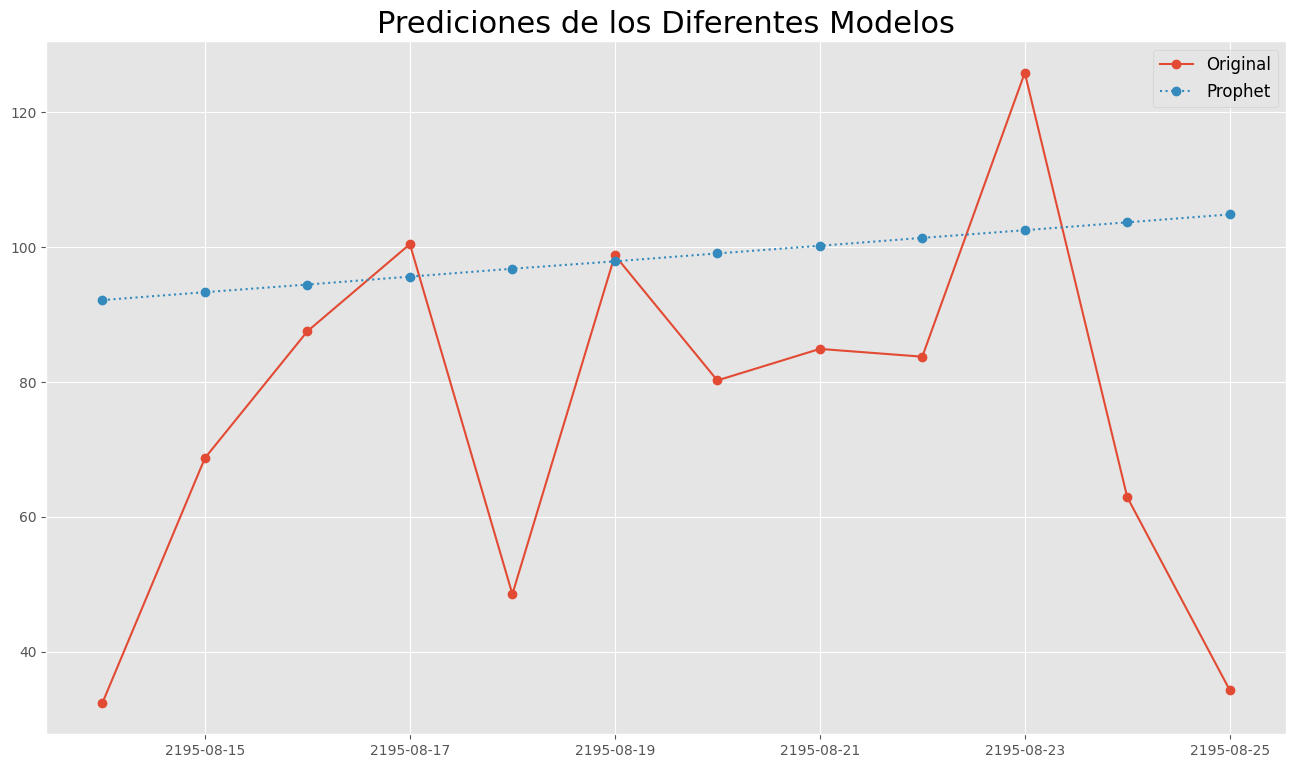

In [ ]:
# Grafica
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Tiempo_Total"],label="Original", linestyle="-")
#plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], label="Arima",linestyle="-.")
#plt.plot_date(test_data.index, test_data["LSTM_Predictions"],label="LSTM", linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], label="Prophet",linestyle=":")
plt.legend(fontsize=12)
plt.title("Prediciones de los Diferentes Modelos", fontsize=22)
plt.show();

In [ ]:
#!pip install --tarjet=$nb_path skforecast
!pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 397.3/397.3 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 12.1 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.66.1
    Uninstalling tqdm-4.66.1:
      Successfully uninstalled tqdm-4.66.1


In [ ]:
# Modelo 2

import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 10

# Modelado y Forecasting
# ==============================================================================
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.ForecasterAutoregCustom import ForecasterAutoregCustom
from skforecast.ForecasterAutoregDirect import ForecasterAutoregDirect
from skforecast.model_selection import grid_search_forecaster
from skforecast.model_selection import backtesting_forecaster
from skforecast.utils import save_forecaster
from skforecast.utils import load_forecaster

# Configuración warnings
# ==============================================================================
import warnings
# warnings.filterwarnings('ignore')

In [ ]:
datos = df

In [ ]:
url = 'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/data/h2o_exog.csv'
datos1 = pd.read_csv(url, sep=',')

In [ ]:
datos

,FECHA_LLEGADA,FECHA_TRIAGE,FECHA_INGRESO,FECHA_ATENCION,TIEMPO_DGTURNO_A_TRIAGE,TIEMPO_TRIAGE_A_INGRESO,TIEMPO_INGRESO_A_CONSULTA,TIEMPO_TOTAL,Tiempo_Minutos_Total,CENTRO_ATENCION,...,AÑO,MES,DIA_SEMANA,HOUR,Turnos,TIME,DIA,Tiempo_Total,Month,fecha
1,2023-01-01 01:20:23.853,2023-01-01 01:28:01.847,2023-01-01 01:29:41.210,2023-01-01 02:00:07.590,0:07:38,0:01:40,0:30:26,0:39:44,39.73,TN,...,2023,1,DOMINGO,1,NOCHE,2023-01-01 01:20:23.853,1,39.73,2023-01-01,2023-01-01
2,2023-01-01 01:29:46.050,2023-01-01 01:48:03.070,2023-01-01 01:49:40.973,2023-01-01 02:02:53.663,0:18:17,0:01:37,0:13:13,0:33:07,33.12,ME,...,2023,1,DOMINGO,1,NOCHE,2023-01-01 01:29:46.050,1,33.12,2023-01-01,2023-01-01
3,2023-01-01 03:15:35.623,2023-01-01 03:23:01.990,2023-01-01 03:23:39.793,2023-01-01 03:30:21.233,0:07:26,0:00:38,0:06:42,0:14:46,14.77,UC,...,2023,1,DOMINGO,3,NOCHE,2023-01-01 03:15:35.623,1,14.77,2023-01-01,2023-01-01
4,2023-01-01 05:54:53.563,2023-01-01 06:00:07.943,2023-01-01 06:02:07.320,2023-01-01 06:26:17.050,0:05:14,0:02:00,0:24:10,0:31:24,31.40,UC,...,2023,1,DOMINGO,5,NOCHE,2023-01-01 05:54:53.563,1,31.40,2023-01-01,2023-01-01
5,2023-01-01 06:37:27.237,2023-01-01 07:52:31.687,2023-01-01 07:52:37.717,2023-01-01 09:31:15.597,1:15:04,0:00:06,1:38:38,2:53:48,173.80,TN,...,2023,1,DOMINGO,6,NOCHE,2023-01-01 06:37:27.237,1,173.80,2023-01-01,2023-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82412,2023-09-18 04:44:41.970,2023-09-18 04:53:22.553,2023-09-18 05:05:51.423,2023-09-18 06:09:35.867,0:08:41,0:12:29,1:03:44,1:24:54,84.90,ME,...,2023,9,LUNES,4,NOCHE,2023-09-18 04:44:41.970,18,84.90,2023-09-01,2023-09-01
82413,2023-09-18 06:17:00.573,2023-09-18 06:28:43.040,2023-09-18 06:35:38.213,2023-09-18 07:40:45.957,0:11:43,0:06:55,1:05:07,1:23:45,83.75,ME,...,2023,9,LUNES,6,NOCHE,2023-09-18 06:17:00.573,18,83.75,2023-09-01,2023-09-01
82414,2023-09-18 06:21:37.273,2023-09-18 07:00:57.420,2023-09-18 07:16:45.907,2023-09-18 08:27:27.337,0:39:20,0:15:48,1:10:42,2:05:50,125.83,ME,...,2023,9,LUNES,6,NOCHE,2023-09-18 06:21:37.273,18,125.83,2023-09-01,2023-09-01
82415,2023-09-18 06:25:33.483,2023-09-18 06:42:02.883,2023-09-18 06:51:35.970,2023-09-18 07:28:28.290,0:16:29,0:09:33,0:36:53,1:02:55,62.92,UB,...,2023,9,LUNES,6,NOCHE,2023-09-18 06:25:33.483,18,62.92,2023-09-01,2023-09-01


In [ ]:
datos1

In [ ]:
# agrupar datos
datos2 = datos.groupby('Month')['Tiempo_Total'].mean()
datos2

Month
2023-01-01    107.490400
2023-02-01    104.363828
2023-03-01    112.497437
2023-04-01    107.439636
2023-05-01    116.109004
2023-06-01    108.183079
2023-07-01    100.240377
2023-08-01    106.878000
2023-09-01    111.367566
Name: Tiempo_Total, dtype: float64

In [ ]:
# Preparación del dato
# ==============================================================================
datos['fecha'] = df['Month'].dt.strftime('%Y-%m-01')
datos = datos.set_index('fecha')
datos = datos.rename(columns={'x': 'Tiempo_Total'})
datos = datos.asfreq('MS')
datos = datos.sort_index()
datos.head()

In [ ]:
# Preparación del dato
# ==============================================================================
datos1['fecha'] = pd.to_datetime(datos1['fecha'], format='%Y-%m-%d')
datos1 = datos1.set_index('fecha')
datos1 = datos1.rename(columns={'x': 'y'})
datos1 = datos1.asfreq('MS')
datos1 = datos1.sort_index()
datos1.head()

In [ ]:
datos2

Month
2023-01-01    107.490400
2023-02-01    104.363828
2023-03-01    112.497437
2023-04-01    107.439636
2023-05-01    116.109004
2023-06-01    108.183079
2023-07-01    100.240377
2023-08-01    106.878000
2023-09-01    111.367566
Name: Tiempo_Total, dtype: float64

In [ ]:
print(f'Número de filas con missing values: {datos.isnull().any(axis=1).mean()}')

Número de filas con missing values: 0.0


In [ ]:
# Verificar que un índice temporal está completo
# ==============================================================================
(datos.index == pd.date_range(
                    start = datos.index.min(),
                    end   = datos.index.max(),
                    freq  = datos.index.freq)
).all()

In [ ]:
datos_train

In [ ]:
datos_test

Fechas train : 2023-01-01 00:00:00 --- 2023-09-01 00:00:00  (n=82413)
Fechas test  : 2023-09-01 00:00:00 --- 2023-09-01 00:00:00  (n=3)


KeyError: ignored

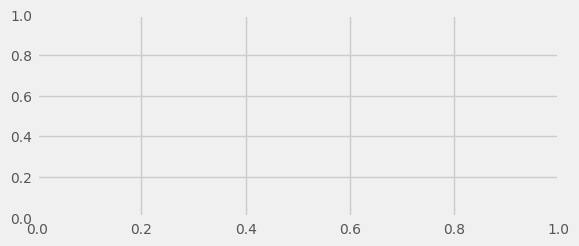

In [ ]:
steps = 3
datos_train = datos[:-steps]
datos_test  = datos[-steps:]

print(f"Fechas train : {datos_train.index.min()} --- {datos_train.index.max()}  (n={len(datos_train)})")
print(f"Fechas test  : {datos_test.index.min()} --- {datos_test.index.max()}  (n={len(datos_test)})")

fig, ax = plt.subplots(figsize=(6, 2.5))
datos_train['y'].plot(ax=ax, label='train')
datos_test['y'].plot(ax=ax, label='test')
ax.legend();